<img src=https://lstms-brainybits.s3.ap-south-1.amazonaws.com/green+logo.png width="300" height="200" style="float: left; margin-right: 8px;">

We believe in empowering individuals with the
knowledge and skills they need to become lifelong
learners. Our self-learning website offers a diverse
range of high-quality, interactive courses.
**All rights reserved to BrainyBits. Unauthorized reproduction or distribution of this content is prohibited.**

# Gradient Boosting

### 1. Importing the libraries

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Load the iris dataset

In [2]:
data = load_iris()
X = data.data
y = data.target

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [16]:
len(X)

150

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 3. Split the data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4.build a Gradient Boosting classifier

In [8]:
gb = GradientBoostingClassifier()

### 5. hyperparameters tunning

In [9]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


### 6. Training the Model

In [10]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

### 7. Best hyperparameters and Best Model

In [12]:
Best_Hyperparameters =  grid_search.best_params_
print(Best_Hyperparameters)
best_gb_model = grid_search.best_estimator_
best_gb_model

{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}


GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=3,
                           n_estimators=200)

### 8. Predictions and Accuracy of  the model

In [13]:
y_pred = best_gb_model.predict(X_test)
y_pred
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

1.0

### 9. Confussion Matrix

In [14]:
# confusion matrix

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

True Positives(TP) =  10

True Negatives(TN) =  9

False Positives(FP) =  0

False Negatives(FN) =  0


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 10. Display the confusion matrix using a heatmap

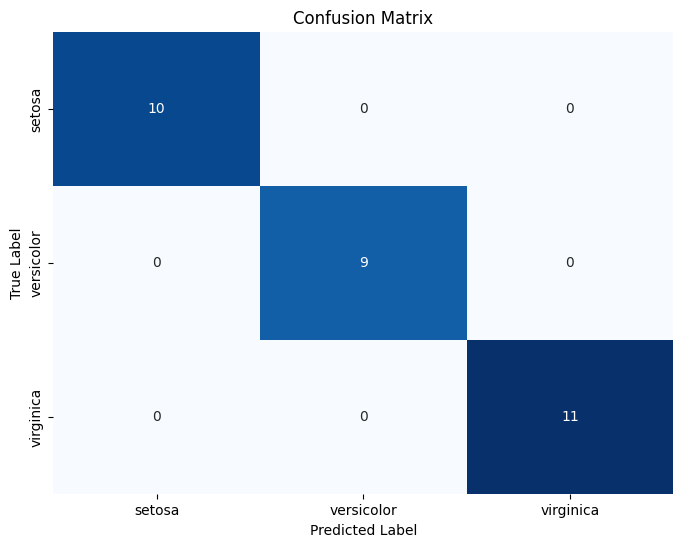

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()